# 1-7. 프로젝트: 가위바위보 분류기 만들기

가위바위보 분류기를 만드는 프로젝트를 진행하였다. 가위바위보 이미지 데이터를 카메라를 통해 직접 사진을 찍어 만들었다. 준비된 이미지 데이터를 분류 모델에 학습시키고 가위, 바위, 보 이미지를 분류하였다.

## 데이터 준비

### 데이터 만들기

노트북 전면 카메라를 활용하여 가위, 바위, 보 이미지 각 100장씩 만들었다. 이미지를 한 장씩 찍는 것은 어려움이 있으므로 구글의 teachable machine 사이트를 이용하여 각 이미지를 캡쳐하였다. Image Project를 선택하여 Webcam을 구동하고 이미지 데이터를 직접 촬영할 수 있다.

### 디렉토리 만들기

이미지를 저장하기 위한 디렉토리를 만들었다. rock_scissor_paper 및 하위 디렉토리를 만들었다.

mkdir -p ~/aiffel/rock_scissor_paper/scissor

mkdir -p ~/aiffel/rock_scissor_paper/rock

mkdir -p ~/aiffel/rock_scissor_paper/paper

ls -l ~/aiffel/rock_scissor_paper

### 데이터 불러오기 및 Resize 하기

이미지를 처리할 수 있는 라이브러인 pillow를 설치하였다. 
또한, 환경 변수의 os 자원을 제어하고, 폴더 안의 특정 리스트를 가져오기 위해 os와 glob 모듈을 불러왔다.

In [3]:
# PIL 라이브러리가 설치되어 있지 않다면 설치
!pip install pillow   

from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


가위 이미지 데이터의 크기가 224*224 이므로 28*28 로 변경하였다.

In [4]:
import os
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper/scissor
가위 이미지 resize 완료!


바위 이미지와 보 이미지도 마찬가지로 이미지 크기를 28*28로 조정하였다.

In [5]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]

target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("바위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper/rock
바위 이미지 resize 완료!


In [6]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]

target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("보 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper/paper
보 이미지 resize 완료!


## 데이터 라벨링

가위, 바위, 보 데이터를 읽을 수 있는 load_data() 함수를 만들었다. load_data() 함수의 입력은 이미지가 있는 폴더 위치를 받는다. 여기서 rock_scissor_paper 폴더 위치로 정하였다. 숫자 손글씨 인식기는 0~9까지의 10개의 클래스였지만, 가위바위보 분류기는 가위, 바위, 보의 3개의 클래스로 나눠진다. 가위: 0, 바위: 1, 보: 2 로 라벨링이 될 것이다. 처음 모델에서는 number_of_data에 300을 대입하였고, 이후에 정확도 향상을 위해 9000을 대입하였다.

In [7]:
import numpy as np

def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=9000   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 9000 입니다.
x_train shape: (9000, 28, 28, 3)
y_train shape: (9000,)


첫 번째의 이미지를 부르면 다음과 같다.

라벨:  0


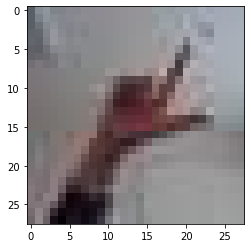

In [8]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

## 딥러닝 네트워크 설계하기

가위바위보 데이터셋은 MNIST와 다르게 RGB의 이미지 데이터 셋으로 들어가고, 3개의 클래스로 분류된다. 따라서 input_shape=(28,28,1)를 input_shape=(28,28,3)으로 변경하고, 최종 분류기의 클래스 수를 10에서 3으로 바꿔준다.

In [9]:
import tensorflow as tf
from tensorflow import keras

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                51264     
_________________________________________________________________
dense_1 (Dense)              (No

## 딥러닝 네트워크 학습시키기

설계된 딥러닝 네트워크로 300개의 가위바위보 이미지를 epoch 10번으로 학습시킨다.

In [10]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
282/282 [==============================] - 4s 16ms/step - loss: 1.9128 - accuracy: 0.5130
Epoch 2/10
282/282 [==============================] - 1s 2ms/step - loss: 0.6007 - accuracy: 0.7411
Epoch 3/10
282/282 [==============================] - 0s 2ms/step - loss: 0.3815 - accuracy: 0.8523
Epoch 4/10
282/282 [==============================] - 1s 2ms/step - loss: 0.2286 - accuracy: 0.9163
Epoch 5/10
282/282 [==============================] - 0s 2ms/step - loss: 0.1394 - accuracy: 0.9476
Epoch 6/10
282/282 [==============================] - 1s 2ms/step - loss: 0.0984 - accuracy: 0.9662
Epoch 7/10
282/282 [==============================] - 0s 2ms/step - loss: 0.0994 - accuracy: 0.9634
Epoch 8/10
282/282 [==============================] - 1s 2ms/step - loss: 0.1116 - accuracy: 0.9632
Epoch 9/10
282/282 [==============================] - 0s 1ms/step - loss: 0.0456 - accuracy: 0.9852
Epoch 10/10
282/282 [==============================] - 0s 2ms/step - loss: 0.0256 - accuracy: 0.992

학습 데이터가 300일 때는, accuracy가 1.00의 값을 가진다. 학습 데이터의 갯수가 9000일 때는, accuracy가 0.99이다.

## 테스트 데이터 만들기

테스트 데이터를 만드는 방법은 학습 데이터를 만드는 방법과 유사하다.

In [11]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.

def load_test_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=300  # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("시험용 데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels
  
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_test, y_test)=load_test_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

시험용 데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


시험용 데이터를 학습된 모델에 사용하여 test_accuracy를 측정하였다.

In [12]:
test_loss, test_accuracy = model.evaluate(x_test ,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 2s - loss: 0.1733 - accuracy: 0.9233
test_loss: 0.17331424355506897 
test_accuracy: 0.9233333468437195


예측을 해보니 학습 데이터의 갯수가 300일 때는 0.33의 정확도를 구하였다. 학습 데이터로 모델에서 학습시키면 모델에서의 정확도가 1.00의 값이였는데, 시험용 데이터로 test_accuracy를 구하면 0.33로 상대적으로 낮은 값을 나타낸다. 결과를 통해 학습 모델이 과적합되었다는 것으로 추측할 수 있다.

## 정확도 향상을 위한 데이터 augmentation

각 이미지당 100개의 적은 수의 이미지로 모델을 학습하였기에 더 많은 이미지를 가져온다면 accuracy가 향상될 수 있다. 총 30명의 이미지 데이터를 불러와 9000장으로 다시 학습시켰다. 가위, 바위, 보의 학습 데이터를 읽을 수 있는 load_data() 함수에서 number_of_data 값을 300에서 9000으로 바꾸어 학습을 진행하였더니 결과는 다음과 같다. 

10/10 - 2s - loss: 0.1733 - accuracy: 0.9233

test_loss: 0.17331424355506897 

test_accuracy: 0.9233333468437195

결과를 통해 정확도가 0.33에서 0.92으로 증가한 것을 확인할 수 있다.

## 총평

학습 모델에서 정확도가 높다고 적합한 모델이 아닌 것을 알게 되었다. 학습 모델의 정확도가 1에 가깝다면 학습 데이터에 과적합되는 것으로 추측할 수 있다. 이에 따라 테스트 정확도는 좋지 못한 성능의 결과를 가져온다. 이를 해결하기 위해서 데이터를 더 많이 가져온다면 정확도의 향상을 만들어낼 수 있다. 여기서는 정확도 향상을 위한 방법 중 데이터를 증가시키는 방법만을 사용하였는데, 또 다른 방법으로 학습 모델에서 하이퍼파라미터를 변경해보면 더 좋은 성능을 나타내는 모델을 만들 수 있을 것이다.